<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Jester_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619443 sha256=5efad0424191b2104213cdfa213115f4c9e5f93655c09ba69f73ec5edc3a55c7
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import numpy as np
import pandas as pd
from surprise import SVD, KNNBasic, Dataset, Reader, NMF
from surprise.model_selection import cross_validate


In [5]:
from google.colab import drive # to import Google drive
drive.mount('/content/drive') # mounting Google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/"My Drive/Colab Notebooks/AI Assignment"

/content/drive/My Drive/Colab Notebooks/AI Assignment


In [7]:
df=pd.read_csv("jester-data-1.csv")
df=df.drop(['Number of Ratings'],axis=1)

In [8]:
df

,UserID,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,J17,J18,J19,J20,J21,J22,J23,J24,J25,J26,J27,J28,J29,J30,J31,J32,J33,J34,J35,J36,J37,J38,J39,...,J61,J62,J63,J64,J65,J66,J67,J68,J69,J70,J71,J72,J73,J74,J75,J76,J77,J78,J79,J80,J81,J82,J83,J84,J85,J86,J87,J88,J89,J90,J91,J92,J93,J94,J95,J96,J97,J98,J,J100
0,U1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,U2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.00,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,U3,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,U4,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,U5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,U24979,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.00,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,U24980,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,U24981,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.00,7.23,6.75,-6.00,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,U24982,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2

In [9]:
df2=df
df2

,UserID,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,J17,J18,J19,J20,J21,J22,J23,J24,J25,J26,J27,J28,J29,J30,J31,J32,J33,J34,J35,J36,J37,J38,J39,...,J61,J62,J63,J64,J65,J66,J67,J68,J69,J70,J71,J72,J73,J74,J75,J76,J77,J78,J79,J80,J81,J82,J83,J84,J85,J86,J87,J88,J89,J90,J91,J92,J93,J94,J95,J96,J97,J98,J,J100
0,U1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,U2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.00,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,U3,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,U4,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,U5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,U24979,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.00,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,U24980,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,U24981,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.00,7.23,6.75,-6.00,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,U24982,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2

In [10]:
colname=df2.columns[1:101]

In [11]:
df3=(df.values)   #df2[:,1:102]

In [12]:
ratings=(df3[:,1:102].ravel())
ratings.size

2498300

In [13]:
a=[]

for i in range (1,24984):
    a=a+[i]


In [14]:
b=[]
for i in range(100):
  b.extend(a)

In [15]:
b.sort()

In [16]:
jokes=[]

for i in range (1,101):
    jokes=jokes+[str(i)]

In [17]:
users=b   #length=2498300
movies=jokes*24983   #length=2498300 

ratings_dict={'userID':users,
              'itemID':movies,
              'rating':ratings}

df=pd.DataFrame(ratings_dict)

In [18]:
df

,userID,itemID,rating
0,1,1,-7.82
1,1,2,8.79
2,1,3,-9.66
3,1,4,-8.16
4,1,5,-7.52
...,...,...,...
2498295,24983,96,NaN
2498296,24983,97,NaN
2498297,24983,98,NaN
2498298,24983,99,NaN


In [19]:
df.dropna(inplace=True)


In [20]:
df

,userID,itemID,rating
0,1,1,-7.82
1,1,2,8.79
2,1,3,-9.66
3,1,4,-8.16
4,1,5,-7.52
...,...,...,...
2498267,24983,68,7.48
2498268,24983,69,5.15
2498269,24983,70,3.2
2498270,24983,71,6.26


In [21]:
df=df.iloc[0:1000000]

In [22]:
#write df in place of newdf for final run
reader=Reader(rating_scale=(-10,10))
trainset=Dataset.load_from_df(df[['userID','itemID','rating']],reader).build_full_trainset()

In [23]:
#write df in place of newdf for final run
data=Dataset.load_from_df(df[['userID','itemID','rating']],reader)

In [24]:
!pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30190 sha256=055ca4ebeb653096fa7bde4ef2a44be67bf3fc142eb6bf6bdcb4fb7fd1fd9be1
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [25]:
%load_ext memory_profiler

In [26]:
algo_svd=SVD()

In [27]:
%memit cross_validate(algo_svd,data,measures=['rmse','mae'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.0551  4.0741  4.0707  4.0743  4.0884  4.0725  0.0106  
MAE (testset)     3.1418  3.1616  3.1610  3.1627  3.1723  3.1599  0.0100  
Fit time          53.23   53.24   53.24   53.36   53.20   53.25   0.05    
Test time         4.11    3.72    3.55    4.08    3.62    3.81    0.23    
peak memory: 1077.55 MiB, increment: 291.42 MiB


In [32]:
rmse_svd = 4.0725
mae_svd = 3.1599
fittime_svd = 53.25
memory_svd = 1077.55

In [28]:
from surprise import KNNBasic
algo_knn=KNNBasic()

In [29]:
%memit cross_validate(algo_knn,data,measures=['rmse','mae'],cv=5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.1464  4.1660  4.1599  4.1567  4.1587  4.1575  0.0064  
MAE (testset)     3.2717  3.2858  3.2819  3.2777  3.2785  3.2791  0.0047  
Fit time          589.17  652.44  635.43  661.62  634.89  634.71  24.95   
Test time         1608.32 1598.50 1559.31 1571.56 1536.11 1574.76 26.20   
peak memory: 7110.10 MiB, increment: 6101.34 MiB


In [33]:
rsme_knn = 4.1575
mae_knn = 3.2791
fittime_knn = 634.71
memory_knn = 7110.10

In [30]:
algo_nmf=NMF()

In [31]:
%memit cross_validate(algo_nmf,data,measures=['rmse','mae'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5.3610  5.4580  5.5706  5.3108  5.3518  5.4104  0.0935  
MAE (testset)     4.5165  4.5575  4.6351  4.4777  4.5007  4.5375  0.0553  
Fit time          56.07   57.89   56.55   56.41   56.96   56.77   0.63    
Test time         4.02    4.73    3.16    3.86    4.05    3.97    0.50    
peak memory: 7241.33 MiB, increment: 193.79 MiB


In [34]:
rsme_nmf = 5.4104
mae_nmf = 4.5375
fittime_nmf = 56.77
memory_nmf = 7241.33

In [37]:
import matplotlib.pyplot as plt

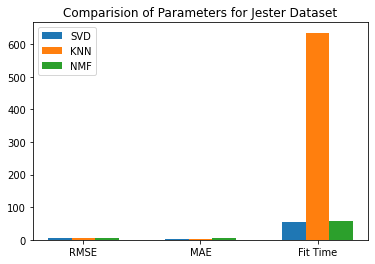

In [38]:
svd_lst = [rmse_svd,mae_svd,fittime_svd]
knn_lst = [rsme_knn,mae_knn,fittime_knn]
nmf_lst = [rsme_nmf,mae_nmf,fittime_nmf]

W = ['RMSE','MAE','Fit Time']
X = svd_lst;
Y = knn_lst;
Z = nmf_lst;
X_axis = np.arange(len(W))
plt.bar(X_axis - 0.2, X, 0.2, label = 'SVD')
plt.bar(X_axis, Y, 0.2, label = 'KNN')
plt.bar(X_axis + 0.2, Z, 0.2, label = 'NMF')
    
plt.xticks(X_axis, W)
plt.title("Comparision of Parameters for Jester Dataset")
plt.legend()
plt.show()

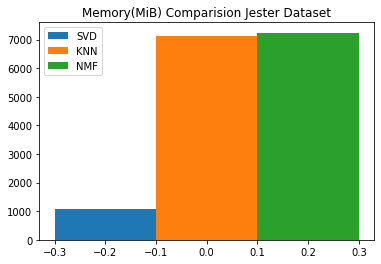

In [39]:
memory = [memory_svd]
plt.bar(np.arange(len(memory))-0.2,memory_svd,0.2,label='SVD')
plt.bar(np.arange(len(memory)), memory_knn, 0.2, label = 'KNN')
plt.bar(np.arange(len(memory)) + 0.2, memory_nmf, 0.2, label = 'NMF')

plt.title("Memory(MiB) Comparision Jester Dataset")
plt.legend()
plt.show()